In [1]:
import xarray as xr
import intake
import intake_esm
import os  
import numpy as np
#from datetime import datetime, date
from cftime import datetime

In [97]:
url = ("https://raw.githubusercontent.com/NCAR/intake-esm-datastore/master/catalogs/pangeo-cmip6.json")
#url = "/g/data/dk92/catalog/v2/esm/cmip6-oi10/catalog.json"
col = intake.open_esm_datastore(url)
col

,unique
activity_id,18
institution_id,36
source_id,88
experiment_id,170
member_id,657
table_id,37
variable_id,700
grid_label,10
zstore,514818
dcpp_init_year,60


In [3]:
np.unique(col.df['table_id'])

array(['3hr', '6hrLev', '6hrPlev', '6hrPlevPt', 'AERday', 'AERhr',
       'AERmon', 'AERmonZ', 'Aclim', 'Amon', 'CF3hr', 'CFday', 'CFmon',
       'E1hrClimMon', 'E3hr', 'Eclim', 'Eday', 'EdayZ', 'Efx', 'Emon',
       'EmonZ', 'Eyr', 'IfxGre', 'ImonGre', 'LImon', 'Lmon', 'Oclim',
       'Oday', 'Odec', 'Ofx', 'Omon', 'Oyr', 'SIclim', 'SIday', 'SImon',
       'day', 'fx'], dtype=object)

In [4]:
np.unique(col.df['experiment_id'])

array(['1pctCO2', '1pctCO2-4xext', '1pctCO2-bgc', '1pctCO2-cdr',
       '1pctCO2-rad', '1pctCO2to4x-withism', 'abrupt-0p5xCO2',
       'abrupt-2xCO2', 'abrupt-4xCO2', 'abrupt-solm4p', 'abrupt-solp4p',
       'amip', 'amip-4xCO2', 'amip-future4K', 'amip-hist', 'amip-lwoff',
       'amip-m4K', 'amip-p4K', 'amip-p4K-lwoff', 'aqua-4xCO2',
       'aqua-control', 'aqua-control-lwoff', 'aqua-p4K', 'aqua-p4K-lwoff',
       'control-1950', 'dcppA-assim', 'dcppA-hindcast',
       'dcppC-amv-ExTrop-neg', 'dcppC-amv-ExTrop-pos',
       'dcppC-amv-Trop-neg', 'dcppC-amv-Trop-pos', 'dcppC-amv-neg',
       'dcppC-amv-pos', 'dcppC-atl-control', 'dcppC-atl-pacemaker',
       'dcppC-hindcast-noAgung', 'dcppC-hindcast-noElChichon',
       'dcppC-hindcast-noPinatubo', 'dcppC-ipv-NexTrop-neg',
       'dcppC-ipv-NexTrop-pos', 'dcppC-ipv-neg', 'dcppC-ipv-pos',
       'dcppC-pac-control', 'dcppC-pac-pacemaker', 'deforest-globe',
       'esm-hist', 'esm-pi-CO2pulse', 'esm-pi-cdr-pulse', 'esm-piControl',
       

In [69]:
np.unique(col.df['variable_id'])

array(['abs550aer', 'agessc', 'airmass', 'albisccp', 'aoanh', 'arag',
       'aragos', 'areacella', 'areacello', 'areacellr', 'bacc', 'baccos',
       'baresoilFrac', 'basin', 'bddtalk', 'bddtdic', 'bddtdife',
       'bddtdin', 'bddtdip', 'bddtdisi', 'bfe', 'bfeos', 'bigthetao',
       'bigthetaoga', 'bldep', 'bsi', 'bsios', 'burntFractionAll', 'c2h6',
       'c3h6', 'c3h8', 'cCwd', 'cLand', 'cLeaf', 'cLitter',
       'cLitterAbove', 'cLitterBelow', 'cLitterLut', 'cProduct',
       'cProductLut', 'cRoot', 'cSoil', 'cSoilFast', 'cSoilLut',
       'cSoilMedium', 'cSoilSlow', 'cVeg', 'cVegLut', 'calc', 'calcos',
       'ccb', 'cct', 'cdnc', 'cfc11', 'cfc113global', 'cfc11global',
       'cfc12', 'cfc12global', 'ch3coch3', 'ch4', 'ch4global',
       'cheaqpso4', 'chegpso4', 'chepasoa', 'chepsoa', 'chl', 'chlcalc',
       'chlcalcos', 'chldiat', 'chldiatos', 'chldiaz', 'chldiazos',
       'chlmisc', 'chlmiscos', 'chlos', 'chlpico', 'chlpicoos', 'ci',
       'cl', 'clayfrac', 'clcalipso', 'c

In [89]:
cat = col.search(
    #experiment_id=["highresSST-present"],
    #institution_id=["NOAA-GFDL"],
    variable_id=["rlut"],
    table_id="E1hrClimMon",
)
cat

,unique
activity_id,1
institution_id,1
source_id,1
experiment_id,1
member_id,1
table_id,1
variable_id,1
grid_label,1
zstore,1
dcpp_init_year,0


In [90]:
cat.df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,NOAA-GFDL,GFDL-CM4,amip,r1i1p1f1,E1hrClimMon,rlut,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/amip/...,NaN,20180701


In [91]:
dset_dict = cat.to_dataset_dict(
    zarr_kwargs={"consolidated": True, "decode_times": True, "use_cftime": True}
)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [92]:
[key for key in dset_dict.keys()]

['CMIP.NOAA-GFDL.GFDL-CM4.amip.E1hrClimMon.gr1']

In [93]:
ds_GFDL_highres = dset_dict['CMIP.NOAA-GFDL.GFDL-CM4.amip.E1hrClimMon.gr1']
ds_GFDL_highres

<xarray.Dataset> Size: 2GB
Dimensions:               (bnds: 2, lat: 180, lon: 288, member_id: 1,
                           dcpp_init_year: 1, time: 432, time_of_day_24: 24,
                           time_of_day_edges_24: 25)
Coordinates:
  * bnds                  (bnds) float64 16B 1.0 2.0
  * lat                   (lat) float64 1kB -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
    lat_bnds              (lat, bnds) float64 3kB dask.array<chunksize=(180, 2), meta=np.ndarray>
  * lon                   (lon) float64 2kB 0.625 1.875 3.125 ... 358.1 359.4
    lon_bnds              (lon, bnds) float64 5kB dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time                  (time) object 3kB 1979-01-16 12:00:00 ... 2014-12-1...
    time_bnds             (time, bnds) object 7kB dask.array<chunksize=(432, 2), meta=np.ndarray>
  * time_of_day_24        (time_of_day_24) object 192B 1870-01-01 00:30:00 .....
  * time_of_day_edges_24  (time_of_day_edges_24) object 200B 1870-01-01 00:00...
  * member_id             (member_id) object 8B 'r1i1p1f1'
  * dcpp_init_year        (dcpp_init_year) float64 8B nan
Data variables:
    rlut                  (member_id, dcpp_init_year, time, time_of_day_24, lat, lon) float32 2GB dask.array<chunksize=(1, 1, 22, 24, 180, 288), meta=np.ndarray>
Attributes: (12/60)
    Conventions:                      CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:                      CMIP
    branch_method:                    no parent
    branch_time_in_child:             0.0
    comment:                          <null ref>
    contact:                          gfdl.climate.model.info@noaa.gov
    ...                               ...
    intake_esm_attrs:variable_id:     rlut
    intake_esm_attrs:grid_label:      gr1
    intake_esm_attrs:zstore:          gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM...
    intake_esm_attrs:version:         20180701
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.NOAA-GFDL.GFDL-CM4.amip.E1hrClimMo...

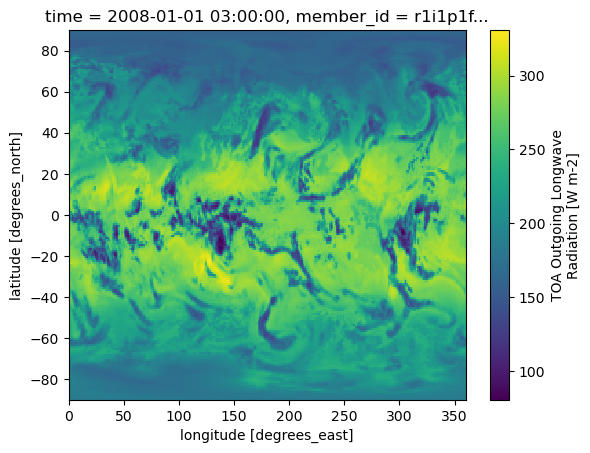

In [83]:
ds_GFDL_highres.rlut.isel(time=0).plot()

In [42]:
# generate 3-hourly cftime in 2014
cftime_slice = xr.cftime_range(start=datetime(2014,1,1,1,30), end=datetime(2014,12,31,22,30), freq="3h", calendar="Julian")

In [44]:
cftime_all = xr.cftime_range(start=datetime(1950,1,1,1,30), end=datetime(2014,12,31,22,30), freq="3h", calendar="Julian")

In [48]:
index_sel = cftime_all.get_indexer(cftime_slice)

In [49]:
ds_GFDL_highres_2014 = ds_GFDL_highres.isel(time=index_sel)

In [50]:
ds_GFDL_highres_2014

<xarray.Dataset> Size: 2GB
Dimensions:         (bnds: 2, lat: 360, lon: 576, member_id: 1,
                     dcpp_init_year: 1, time: 2920)
Coordinates:
  * bnds            (bnds) float64 16B 1.0 2.0
  * lat             (lat) float64 3kB -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
    lat_bnds        (lat, bnds) float64 6kB dask.array<chunksize=(360, 2), meta=np.ndarray>
  * lon             (lon) float64 5kB 0.3125 0.9375 1.562 ... 358.4 359.1 359.7
    lon_bnds        (lon, bnds) float64 9kB dask.array<chunksize=(576, 2), meta=np.ndarray>
  * time            (time) object 23kB 2014-01-01 01:30:00 ... 2014-12-31 22:...
    time_bnds       (time, bnds) object 47kB dask.array<chunksize=(2920, 1), meta=np.ndarray>
  * member_id       (member_id) object 8B 'r1i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
Data variables:
    pr              (member_id, dcpp_init_year, time, lat, lon) float32 2GB dask.array<chunksize=(1, 1, 28, 360, 576), meta=np.ndarray>
Attributes: (12/60)
    Conventions:                      CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:                      HighResMIP
    branch_method:                    none provided
    branch_time_in_child:             0.0
    comment:                          <null ref>
    contact:                          gfdl.climate.model.info@noaa.gov
    ...                               ...
    intake_esm_attrs:variable_id:     pr
    intake_esm_attrs:grid_label:      gr3
    intake_esm_attrs:zstore:          gs://cmip6/CMIP6/HighResMIP/NOAA-GFDL/G...
    intake_esm_attrs:version:         20180701
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           HighResMIP.NOAA-GFDL.GFDL-CM4C192.highr...

In [20]:
ds_GFDL_highres_10yr.to_netcdf('/scratch/wmtsai/test_ground/HighResMIP.NOAA-GFDL.GFDL-CM4C192.highresSST-present.pr.3hr.nc')

In [ ]:
ds

In [ ]:
# generate a sliced dataset for analysis: 2005-2014


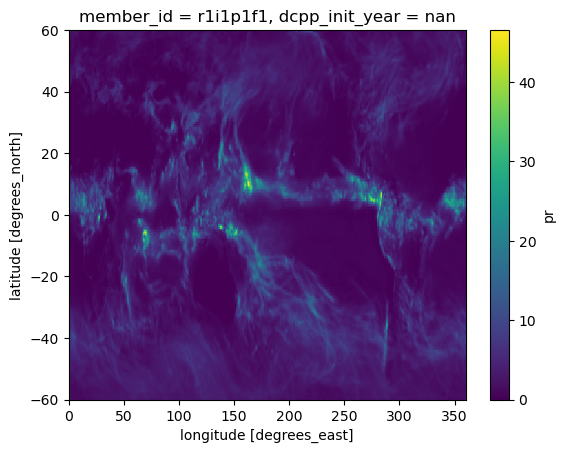

In [25]:
(24*3600*ds_GFDL_highres_10yr.pr.mean('time')).sel(lat=slice(-60,60)).plot()

In [27]:
(24*3600*ds_GFDL_highres_10yr.pr.mean('time')).sel(lat=slice(-60,60)).mean().values

array(3.1157636)